## Cleaning up and prepping data

In [2]:
import pandas as pd
import numpy as np

credit = pd.read_csv('default_of_credit_card_clients.csv', header =1)

# credit.head()
# credit.info()

# These returned false and 0, which means there are no NULLs in this dataframe
credit.isnull().values.any()
credit.isnull().sum()

credit.drop(["ID"], axis = 1, inplace = True) 

# This means there's just a bunch of ints in here
# Do we want to make our main var (what's that called?) into a categorical?
credit.dtypes.value_counts()

credit.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)

# Now let's put stuff into buckets - at least
# credit['AGE'] = pd.qcut(credit['AGE'], q=6)
# credit['AGE_BINS'] = pd.cut(x=credit['AGE'], bins=[20, 29, 39, 49, 59, 69, 79])
# this worked but I don't like having to then map buckets back into INTs

# maybe not the best but im gonna do it bucket by bucket
credit['AGE'] = np.where(credit['AGE'].between(20,29), 20, credit['AGE'])
credit['AGE'] = np.where(credit['AGE'].between(30,39), 30, credit['AGE'])
credit['AGE'] = np.where(credit['AGE'].between(40,49), 40, credit['AGE'])
credit['AGE'] = np.where(credit['AGE'].between(50,59), 50, credit['AGE'])
credit['AGE'] = np.where(credit['AGE'].between(60,69), 60, credit['AGE'])
credit['AGE'] = np.where(credit['AGE'].between(70,79), 70, credit['AGE'])

credit.head(50)
credit.describe()

# Same thing with balances, but more discretion?
# Do bins by 50k, 100k, 250k, 500k, 750k, 1mil
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(0,15000), 15000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(15001,25000), 25000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(25001,35000), 35000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(35001,45000), 45000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(45001,55000), 55000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(55001,65000), 65000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(65001,75000), 75000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(75001,100000), 100000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(100001,250000), 250000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(250001,500000), 500000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(500001,750000), 750000, credit['LIMIT_BAL'])
#credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'].between(750001,1000000), 1000000, credit['LIMIT_BAL'])
# Didn't get what I was expecting so I'm not going to discretize LIMIT_BAL

#credit['LIMIT_BAL'].plot.hist()
#credit.head(50)

credit.to_csv('/Users/dponzio/source/python_dummy/clean_credit.csv',index=False)

## EDA examples from Plan of Attack

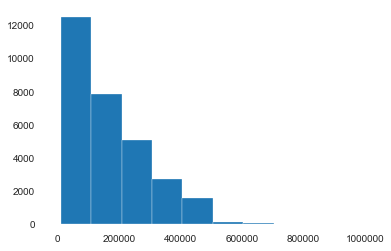

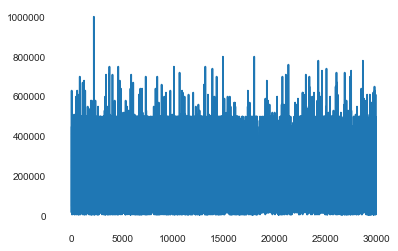

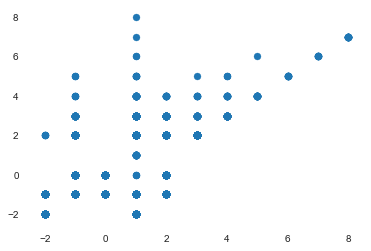

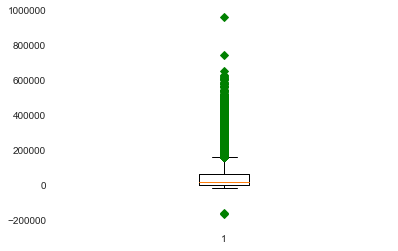

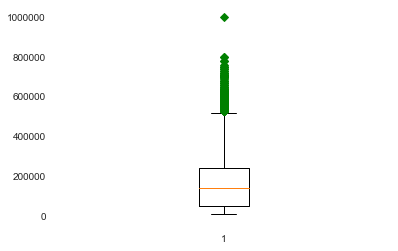

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.691573e+05    -0.401878      1.336860    -2.036834   
PAY_0     -3.954593e+04    -0.031685      0.093584     0.011683   
PAY_2     -4.603765e+04    -0.041442      0.115025     0.015122   
PAY_3     -4.443225e+04    -0.038694      0.107861     0.020421   
PAY_4     -4.057181e+04    -0.034411      0.100528     0.020213   
PAY_5     -3.667056e+04    -0.030521      0.087340     0.021074   
PAY_6     -3.509308e+04    -0.024754      0.074816     0.020616   
BILL_AMT1  2.727020e+09 -1211.694332   1372.377644  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467   1054.657595  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    712.664124  -901.67908

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

credit = pd.read_csv('/Users/dponzio/source/python_dummy/clean_credit.csv')

header = credit.dtypes.index
# Header:
# Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
#      'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#      'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
#     dtype='object')

# Manual EDA


plt.hist(credit['LIMIT_BAL'])
plt.show()

plt.plot(credit['LIMIT_BAL'])
plt.show()

x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

# nothing correlates super highly with Default
corrMat = credit.corr()
print(corrMat)

covMat = credit.cov()
print(covMat)

## Use Pandas Profiling (wow)

In [36]:
import pandas as pd
import pandas_profiling as pp

credit = pd.read_csv('/Users/dponzio/source/python_dummy/clean_credit.csv')

pp.ProfileReport(credit)

Cleared out Pandas Profiling Report because it made my notebook too big for Github.
Info on the report was super useful and will save me a bunch of time.


## Data Key for reference

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 -X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.
	
	The measurement scale for the repayment status is:

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9= payment delay for nine months and above.X12-X17: Amount of bill statement (NT dollar). 

X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default

# Full Exploratory Data Analysis

### Import libraries and read CSV

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns 

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

credit = pd.read_csv('/Users/dponzio/source/python_dummy/clean_credit.csv')

### Analysis

In [7]:
# Quick look at data
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,20,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,20,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,30,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [8]:
# This was shown in the plan of attack:
##  header = credit.dtypes.index
# But you can just do

credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [36]:
# Make sure everything is an int
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [27]:
# Check marriage groups
# Most are either married or single
# More single than married
credit.groupby('MARRIAGE')['MARRIAGE'].count()

# More Women
# credit.groupby('SEX')['SEX'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [29]:
import numpy as np

# Check counts for defaults by different columns
# More defaults for women but there are also more women observations
credit.pivot_table('DEFAULT', 'SEX', aggfunc=np.sum, margins=True)

# Get marriage counts
credit.pivot_table('DEFAULT', 'MARRIAGE', aggfunc=np.sum, margins=True)

# Recall our counts:

# MARRIAGE
# 0       54
# 1    13659
# 2    15964
# 3      323

# 5 'others' defaulted, out of 54 (9.2%)
# 3206 'married' defaulted, out of 13659 (23.4%)
# 3341 'single' defaulted, out of 15964 (20.9%)
# 84 'divorced' defaulted, out of 323 (26%)
# Divorced is more likely to default?

# Gotta do similar math for Education
credit.pivot_table('DEFAULT', 'EDUCATION', aggfunc=np.sum, margins=True)

# Higher loan amount = less likely to default?
credit.pivot_table('DEFAULT', 'LIMIT_BAL', aggfunc=np.sum, margins=True)


,DEFAULT
LIMIT_BAL,
10000,197
16000,0
20000,698
30000,568
40000,92
...,...
760000,0
780000,0
800000,0


In [30]:
table = pd.crosstab(index=[credit.DEFAULT], columns=[credit.EDUCATION,credit.LIMIT_BAL])
table.unstack()

EDUCATION  LIMIT_BAL  DEFAULT
0          50000      0          1
                      1          0
           100000     0          1
                      1          0
           150000     0          1
                                ..
6          450000     1          0
           480000     0          1
                      1          0
           540000     0          1
                      1          0
Length: 678, dtype: int64

In [37]:
# Average age is 30, min is 20, max is 70
credit.AGE.describe()

count    30000.000000
mean        30.856667
std          9.738717
min         20.000000
25%         20.000000
50%         30.000000
75%         40.000000
max         70.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Distribution of custome Ages')

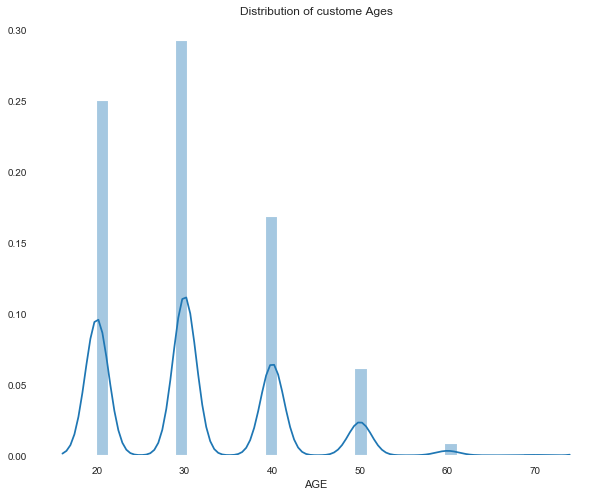

In [42]:
# More young people
age_dist = sns.distplot(credit['AGE'])
age_dist.set_title("Distribution of custome Ages")
# Plot looks very distributed and grouped because we've already binned the data

In [9]:
# Lots of smaller loans, likely for cars or small businesses?
# Very few really big loans, only one 1mil dollar loan

credit['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

#### Compare factors affecting defaults

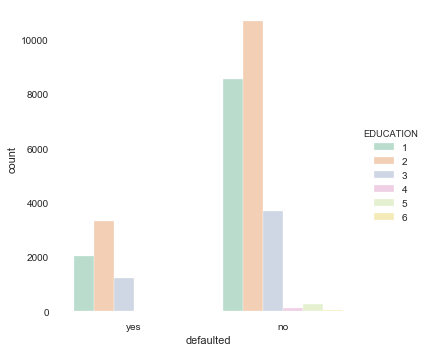

In [23]:
credit['defaulted'] = credit.DEFAULT.map({0:'no', 1:'yes'})

sns.factorplot('defaulted', data=credit, hue='EDUCATION', kind='count', palette='Pastel2', hue_order=range(1,7))

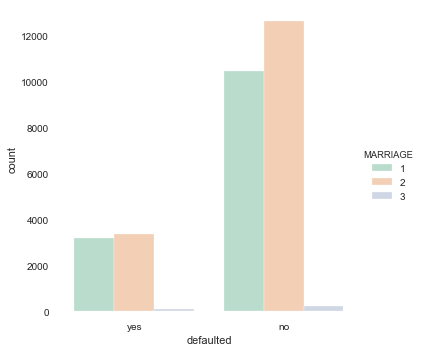

In [22]:
# 2s defaulted more?
sns.factorplot('defaulted', data=credit, hue='MARRIAGE', kind='count', palette='Pastel2', hue_order=range(1,4))

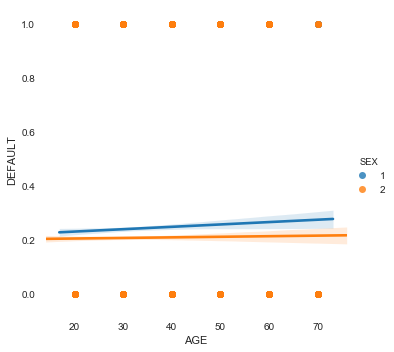

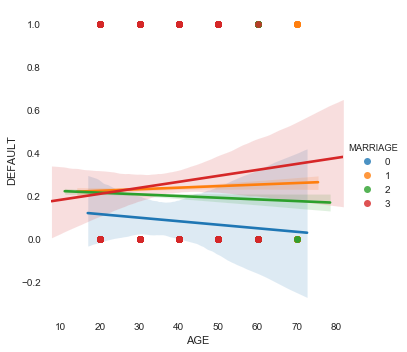

In [33]:
# Older people slightly more likel
# sns.lmplot('AGE', 'DEFAULT', data=credit)
 
credit['gender'] = credit.DEFAULT.map({1:'male', 2:'female'})

# Survived vs. Age grouped by factors
sns.lmplot('AGE', 'DEFAULT', data=credit, hue='SEX')
sns.lmplot('AGE', 'DEFAULT', data=credit, hue='MARRIAGE')
# Divorced are more likely to default